Predicting the outcome of the drugs that might be accurate for a patient

Data Preprocessing

In [2]:
#1. Preprocess data by applying all concepts covered including
#  -dealing with empty values
#  -Handling categorical and non-numeric values(use any type of encoding)
#  -Generate few plots; bar and pie plots using any features but should include both single and multivariate plots.

#2. drop one feature if two features have a correlation greater than 0.9


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('C:/Users/BLESSEDBRAIN/Desktop/Drug_data.csv')



In [14]:
missing_count = df.isnull().sum()
missing_count

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [22]:
# converting categorical data to numeric data (One-Hot Encoding)
# Using Pandas' get_dummies function
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['BP']=encoder.fit_transform(df['BP'])
df['Cholesterol']=encoder.fit_transform(df['Cholesterol'])
df['Drug']=encoder.fit_transform(df['Drug'])

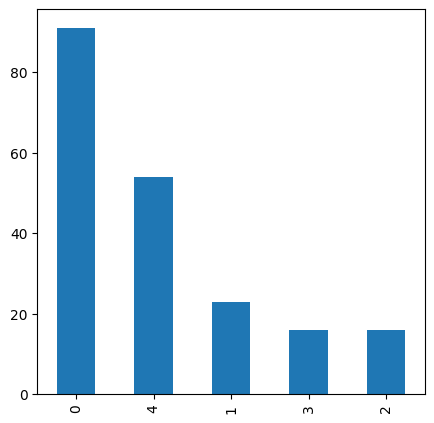

In [26]:
# single variable bar chart
bar1 = df['Drug'].value_counts().plot(kind='bar', figsize=(5,5))

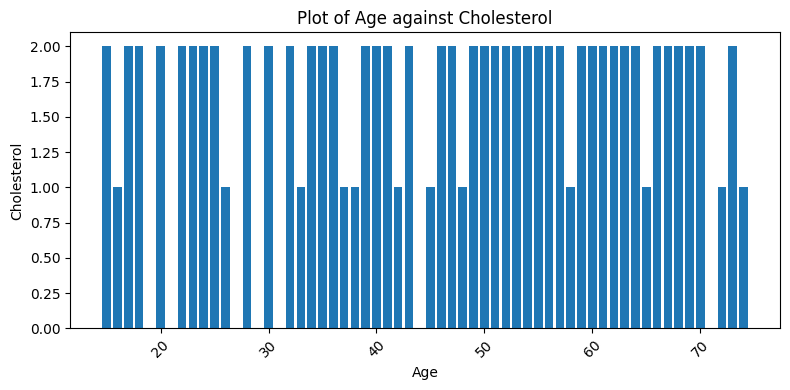

In [28]:
# plots
# Multi-variable Bar Plot
plt.figure(figsize=(8, 4))
plt.bar(df['Age'], df['BP'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Plot of Age against Cholesterol')
plt.xticks(rotation=45)
plt.tight_layout()


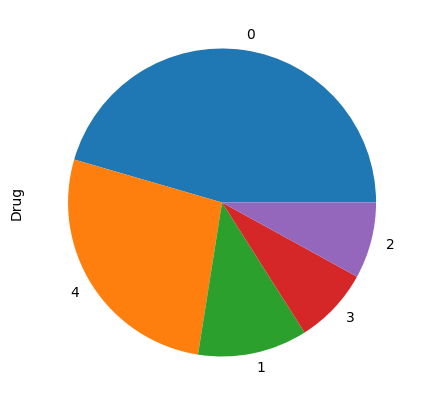

In [25]:
# single variable pie chart
pie1 = df['Drug'].value_counts().plot(kind='pie', figsize=(5,5))

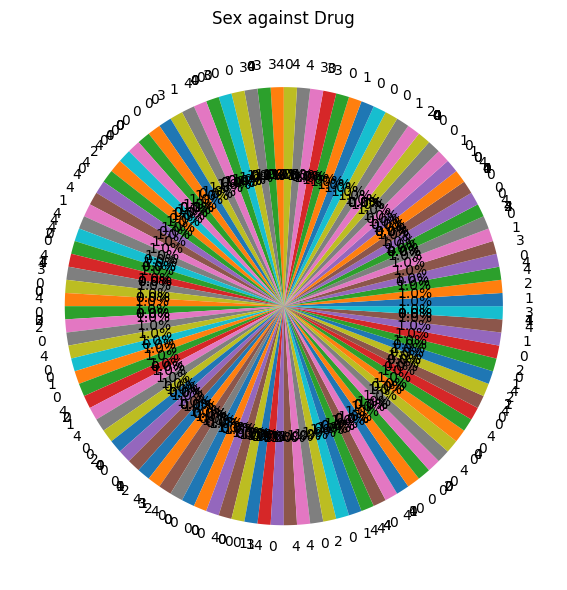

In [24]:
#  Single-variable Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(df['Sex'], labels=df['Drug'], autopct='%1.1f%%', startangle=90)
plt.title('Sex against Drug')
plt.tight_layout()

In [32]:
correlation_matrix = df.corr()
high_correlation = (correlation_matrix > 0.9) & (correlation_matrix < 1)
columns_to_drop = set()

for col in high_correlation.columns:
    correlated_cols = high_correlation.index[high_correlation[col]]
    if len(correlated_cols) > 0:
        columns_to_drop.add(min(correlated_cols)) 
df_dropped = df.drop(columns=columns_to_drop)        
print(df_dropped)  

     Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    0   0            0   25.355     0
1     47    1   1            0   13.093     3
2     47    1   1            0   10.114     3
3     28    0   2            0    7.798     4
4     61    0   1            0   18.043     0
..   ...  ...  ..          ...      ...   ...
195   56    0   1            0   11.567     3
196   16    1   1            0   12.006     3
197   52    1   2            0    9.894     4
198   23    1   2            1   14.020     4
199   40    0   1            1   11.349     4

[200 rows x 6 columns]


Model building

In [54]:
#Split data into target feature and independent features(check meta-data)
X = df.iloc[:,4].values.reshape(-1,1)
# y =  df.iloc[:, 5].values.reshape(-1,1)
y = df['Drug']

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
#train test split data
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3,
random_state = 9)

In [57]:
# perform Feature Scaling using codes below
from sklearn.preprocessing import StandardScaler
#import library
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

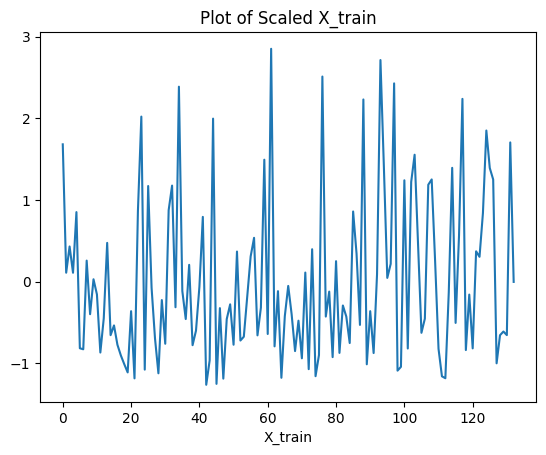

In [58]:
#visualise scaled data
plt.plot(X_train)
plt.xlabel('X_train')
plt.title('Plot of Scaled X_train')
plt.show()

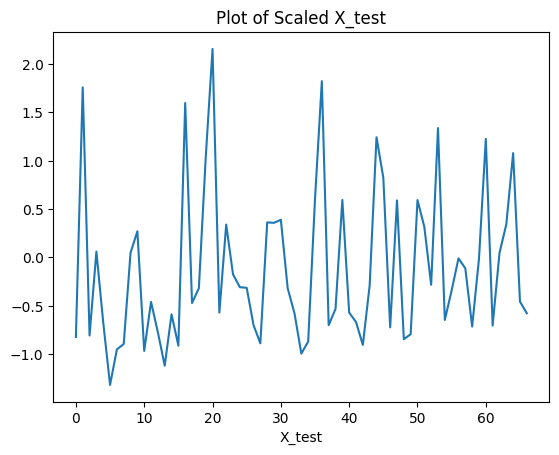

In [59]:
plt.plot(X_test)
plt.xlabel('X_test')
plt.title('Plot of Scaled X_test')
plt.show()

Training a logistic regression classifier

In [60]:
# Fit a Logistic Regression model to the Training set
from sklearn.linear_model import LogisticRegression 
# fit training data to LogisticRegression()

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Make predictions on the Test set
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
test_pred = rf_classifier.predict(X_train)
test_pred

array([0, 0, 0, 0, 0, 3, 4, 0, 1, 0, 0, 3, 4, 0, 2, 4, 4, 1, 2, 4, 4, 4,
       0, 0, 4, 0, 0, 3, 4, 4, 3, 0, 0, 2, 0, 0, 4, 0, 1, 3, 0, 0, 4, 4,
       0, 3, 4, 4, 1, 2, 1, 0, 4, 1, 0, 0, 0, 1, 2, 0, 4, 0, 1, 0, 4, 3,
       0, 2, 2, 4, 4, 0, 3, 0, 1, 1, 0, 1, 0, 4, 0, 2, 4, 3, 4, 0, 0, 1,
       0, 4, 4, 1, 0, 0, 0, 0, 0, 0, 1, 4, 0, 4, 0, 0, 0, 3, 1, 0, 0, 0,
       4, 4, 3, 0, 0, 2, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 1, 2, 4, 4, 0,
       0])

In [63]:
#Training a Support vector machine classifier
# Make predictions on the Test set
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)
train_pred = svm_classifier.predict(X_train)
train_pred

array([0, 0, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 0, 4, 0, 0, 4, 4, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 4, 4,
       0, 4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 4, 4,
       0, 4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 4, 0, 0, 4,
       0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 0, 0, 0, 4, 4, 0, 0, 0,
       4, 4, 4, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0,
       0])

In [64]:
#Training a random forest classifier
# Make predictions on the Test set
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
test_pred = rf_classifier.predict(X_train)
test_pred


array([0, 0, 0, 0, 0, 3, 4, 0, 1, 0, 0, 3, 4, 0, 2, 4, 4, 1, 2, 4, 4, 4,
       0, 0, 4, 0, 0, 3, 4, 4, 3, 0, 0, 2, 0, 0, 4, 0, 1, 3, 0, 0, 4, 4,
       0, 3, 4, 4, 1, 2, 1, 0, 4, 1, 0, 0, 0, 1, 2, 0, 4, 0, 1, 0, 4, 3,
       0, 2, 2, 4, 4, 0, 3, 0, 1, 1, 0, 1, 0, 4, 0, 2, 4, 3, 4, 0, 0, 1,
       0, 4, 4, 1, 0, 0, 0, 0, 0, 0, 1, 4, 0, 4, 0, 0, 0, 3, 1, 0, 0, 0,
       4, 4, 3, 0, 0, 2, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 1, 2, 4, 4, 0,
       0])